# Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Data Preprocessing

In [3]:
# Read data
df= pd.read_csv("/content/drive/MyDrive/Datasets/diabetes_final.csv")


In [4]:
# Check for data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# for cleaniness in further plots, all float types are converted to int
df = df.astype(int)

In [6]:
#Check missing values
print(df.isna().sum())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Data Visualization

In [8]:
# define a function to simplify the plots in further sections
def plot(col_, row, col=3, figsize=(20, 5)):
    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axes = ax.ravel()

    # use for loop to plot
    for i in range(len(col_)):

        # create bar charts for each column
        sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
    )

<Axes: xlabel='Diabetes_012', ylabel='count'>

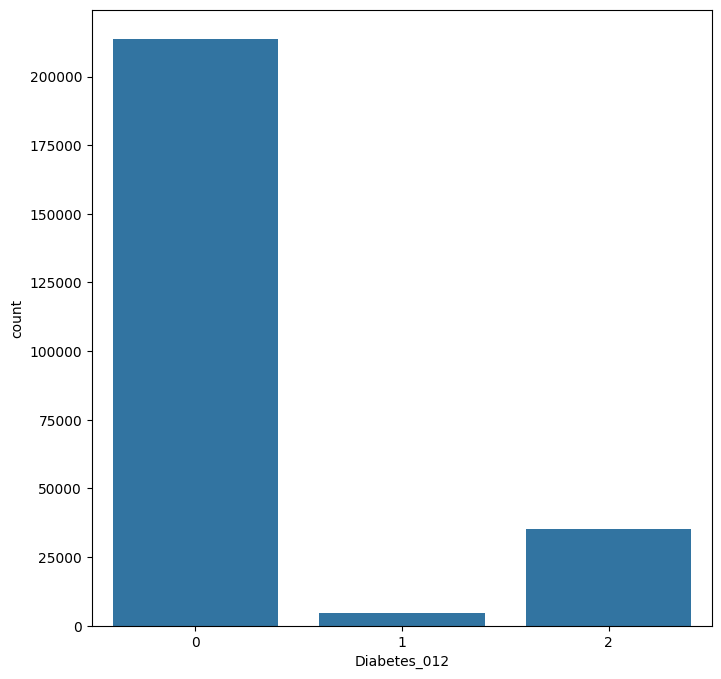

In [9]:
# plot classes
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='Diabetes_012')

<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')


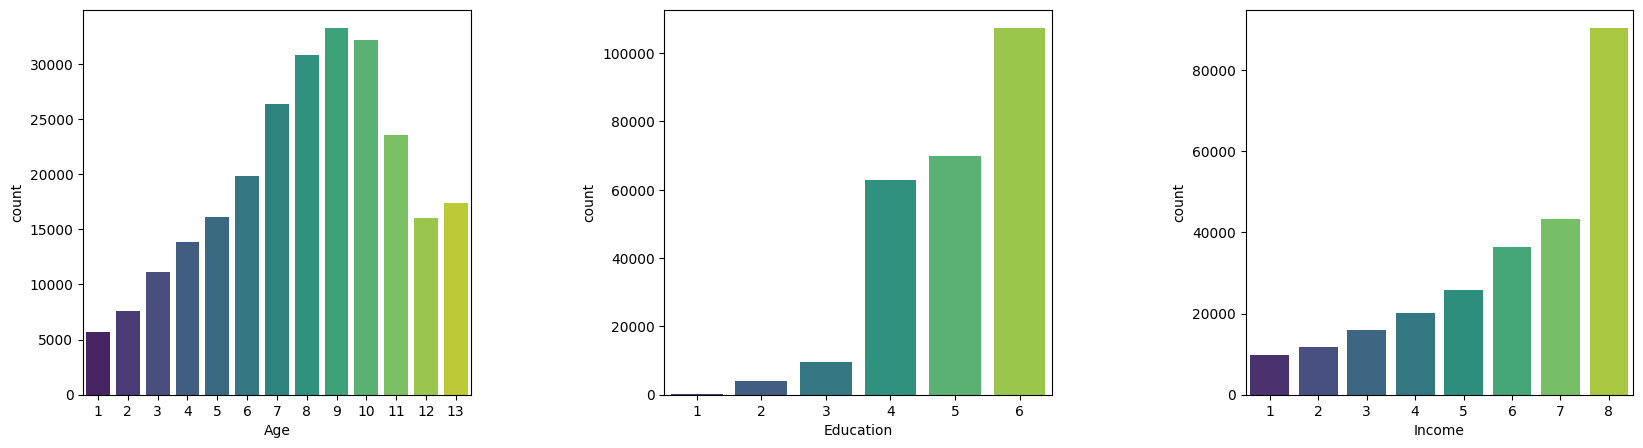

In [10]:
plot(['Age', 'Education', 'Income'], 1, 3)

<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

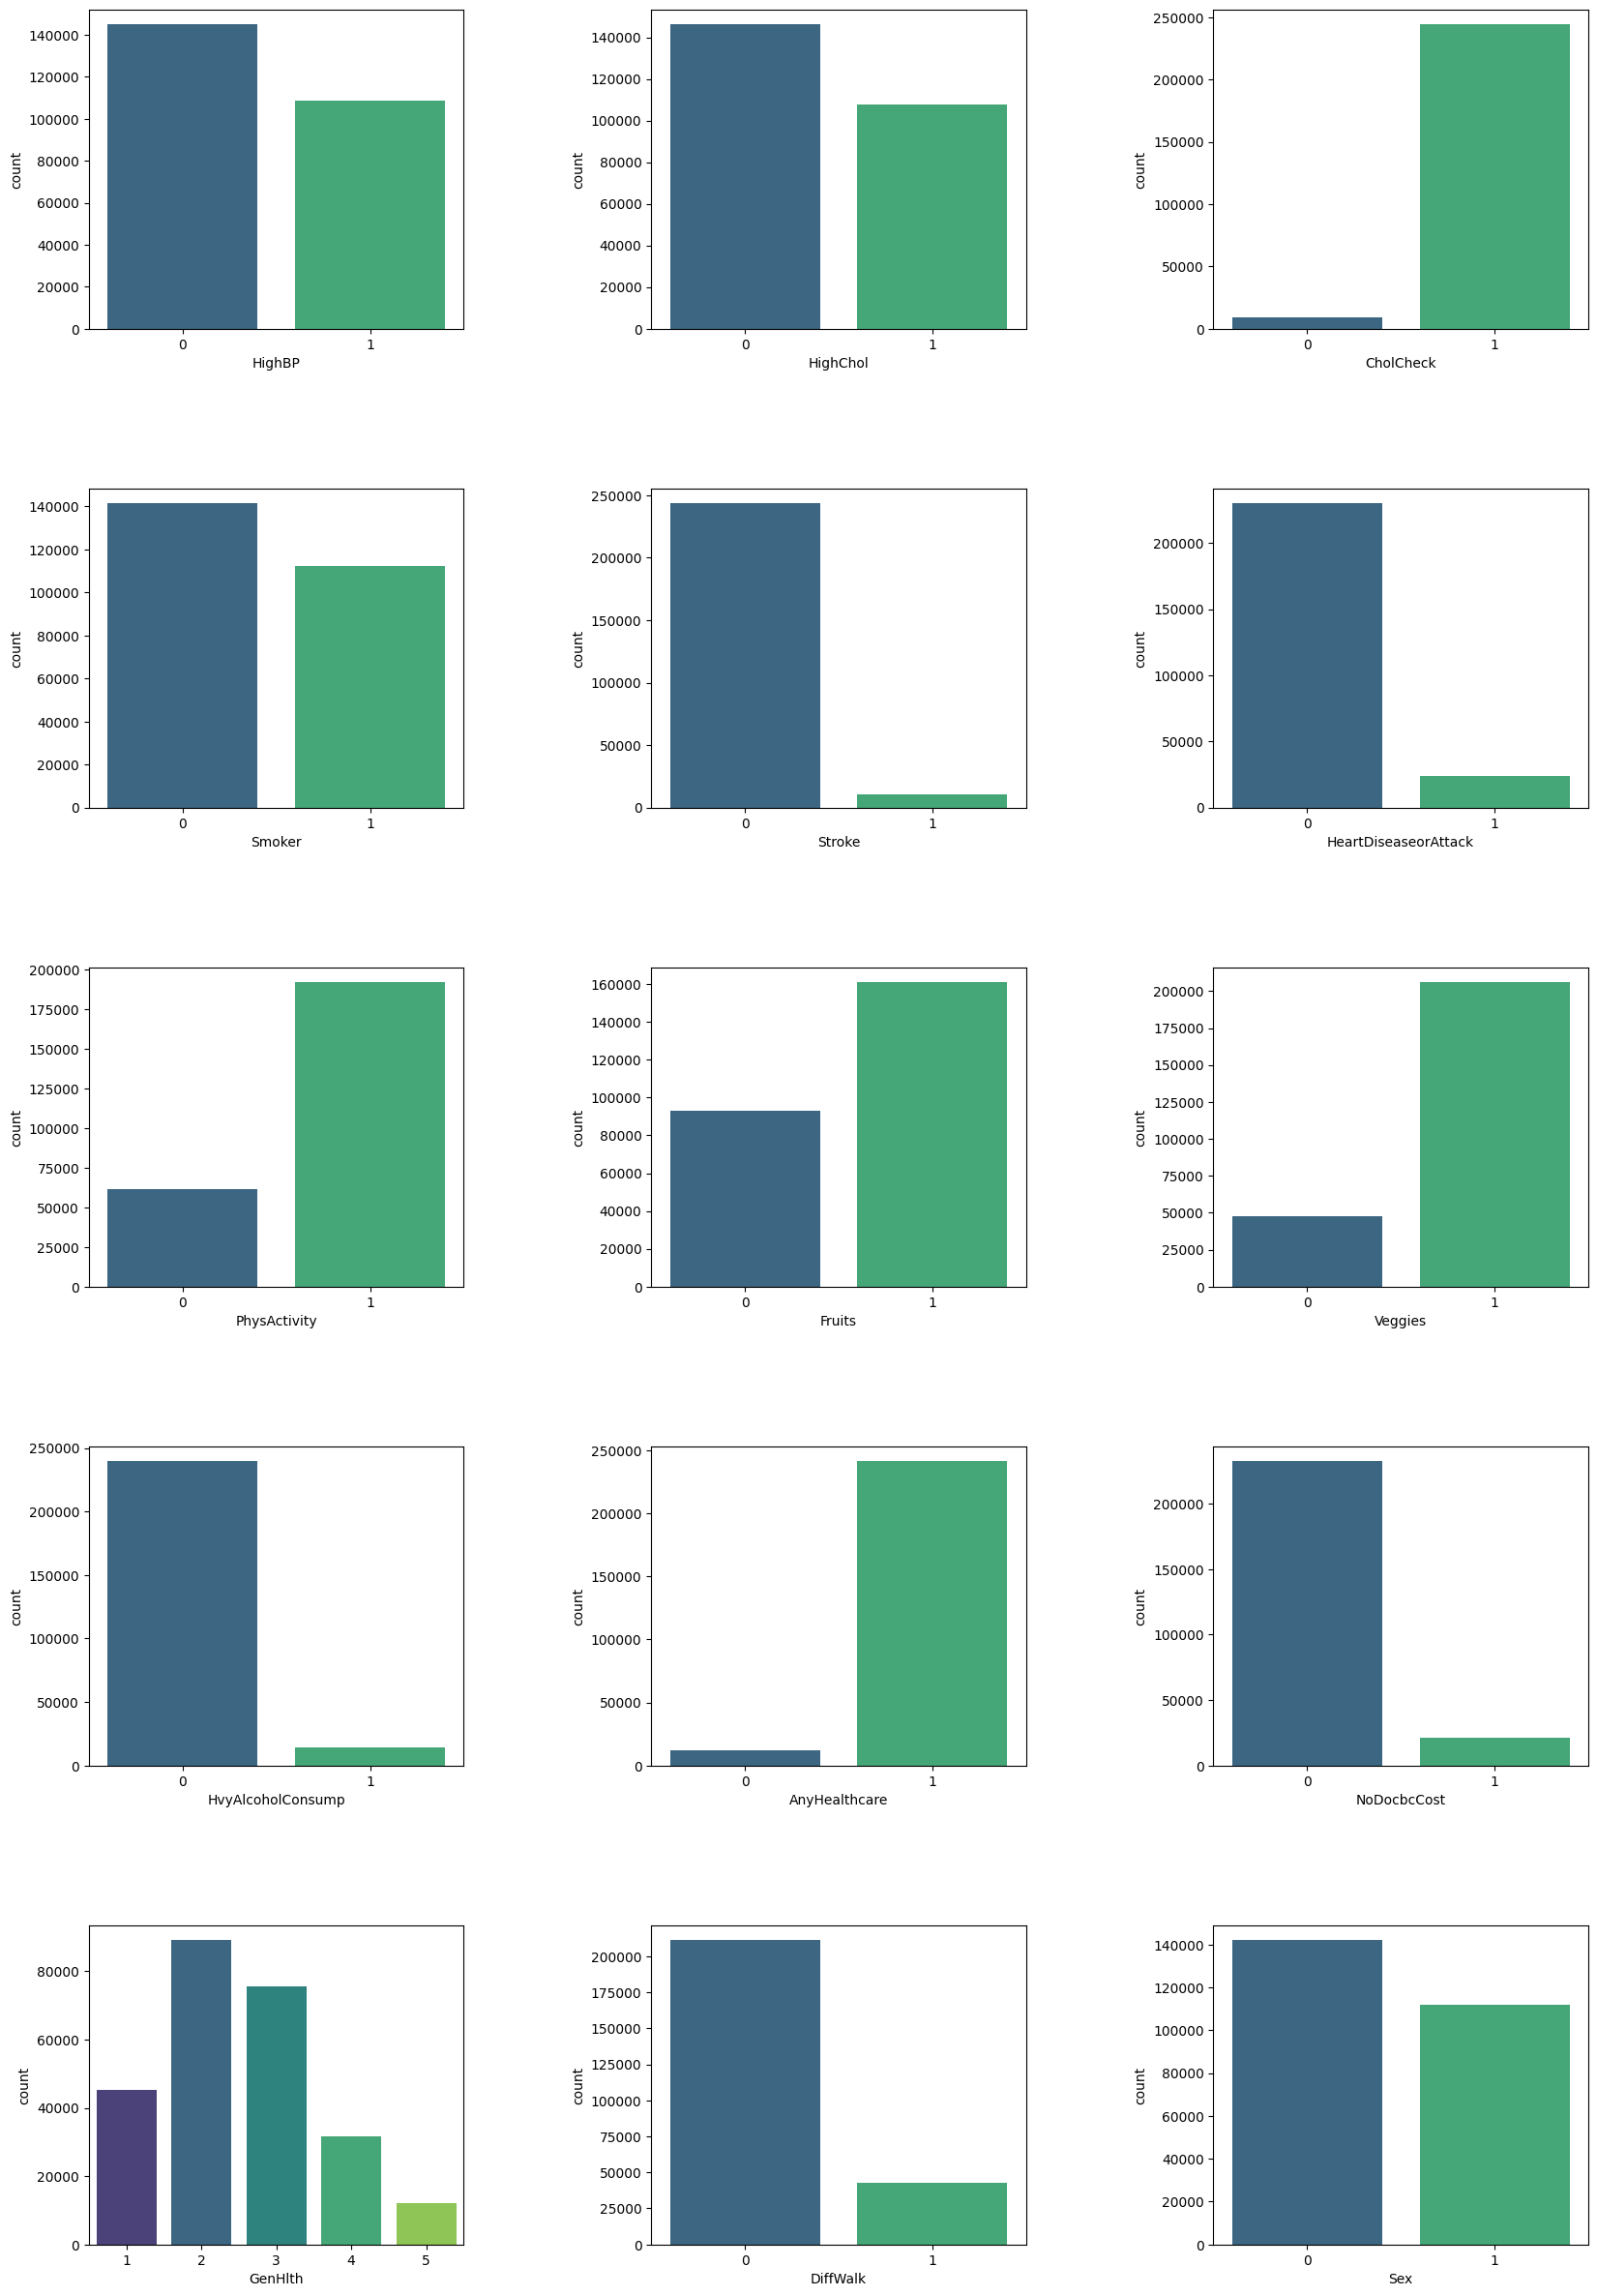

In [11]:
col_ = [x for x in df.columns if x not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
plot(col_, int(len(col_)/3+0.5), figsize=(20, 30))

<Axes: xlabel='BMI', ylabel='Count'>

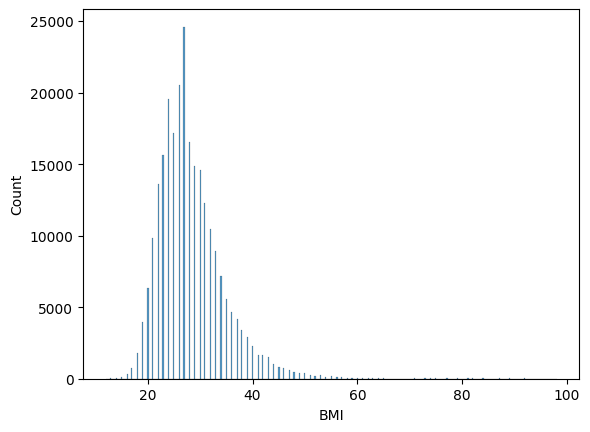

In [12]:
sns.histplot(x=df['BMI'])

<Axes: xlabel='MentHlth', ylabel='count'>

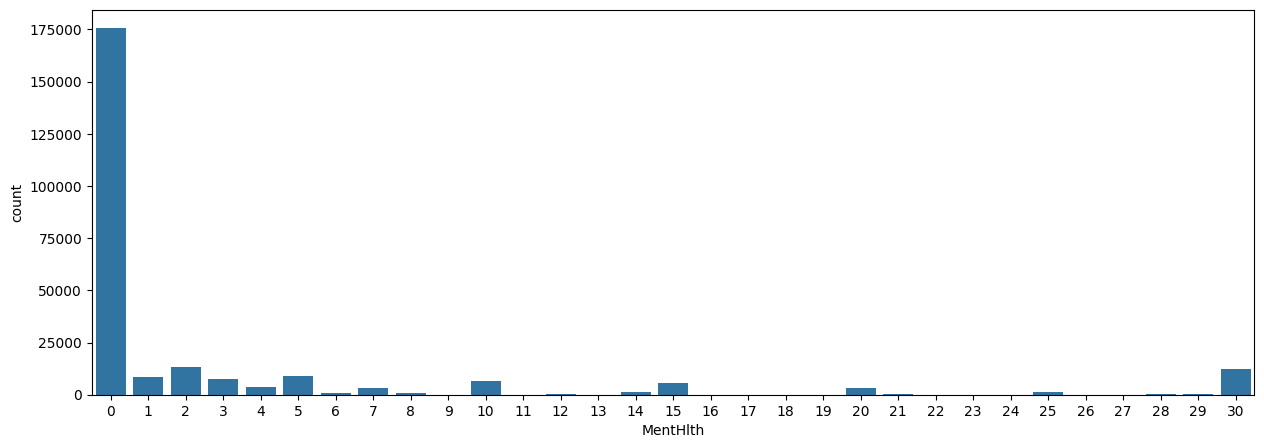

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='MentHlth', ax=ax)

<Axes: xlabel='PhysHlth', ylabel='count'>

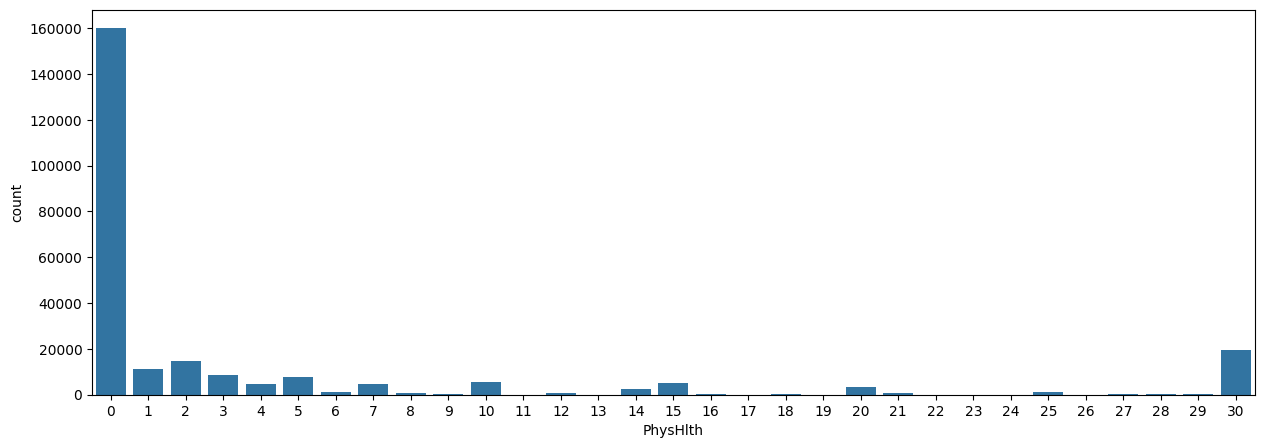

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='PhysHlth', ax=ax)

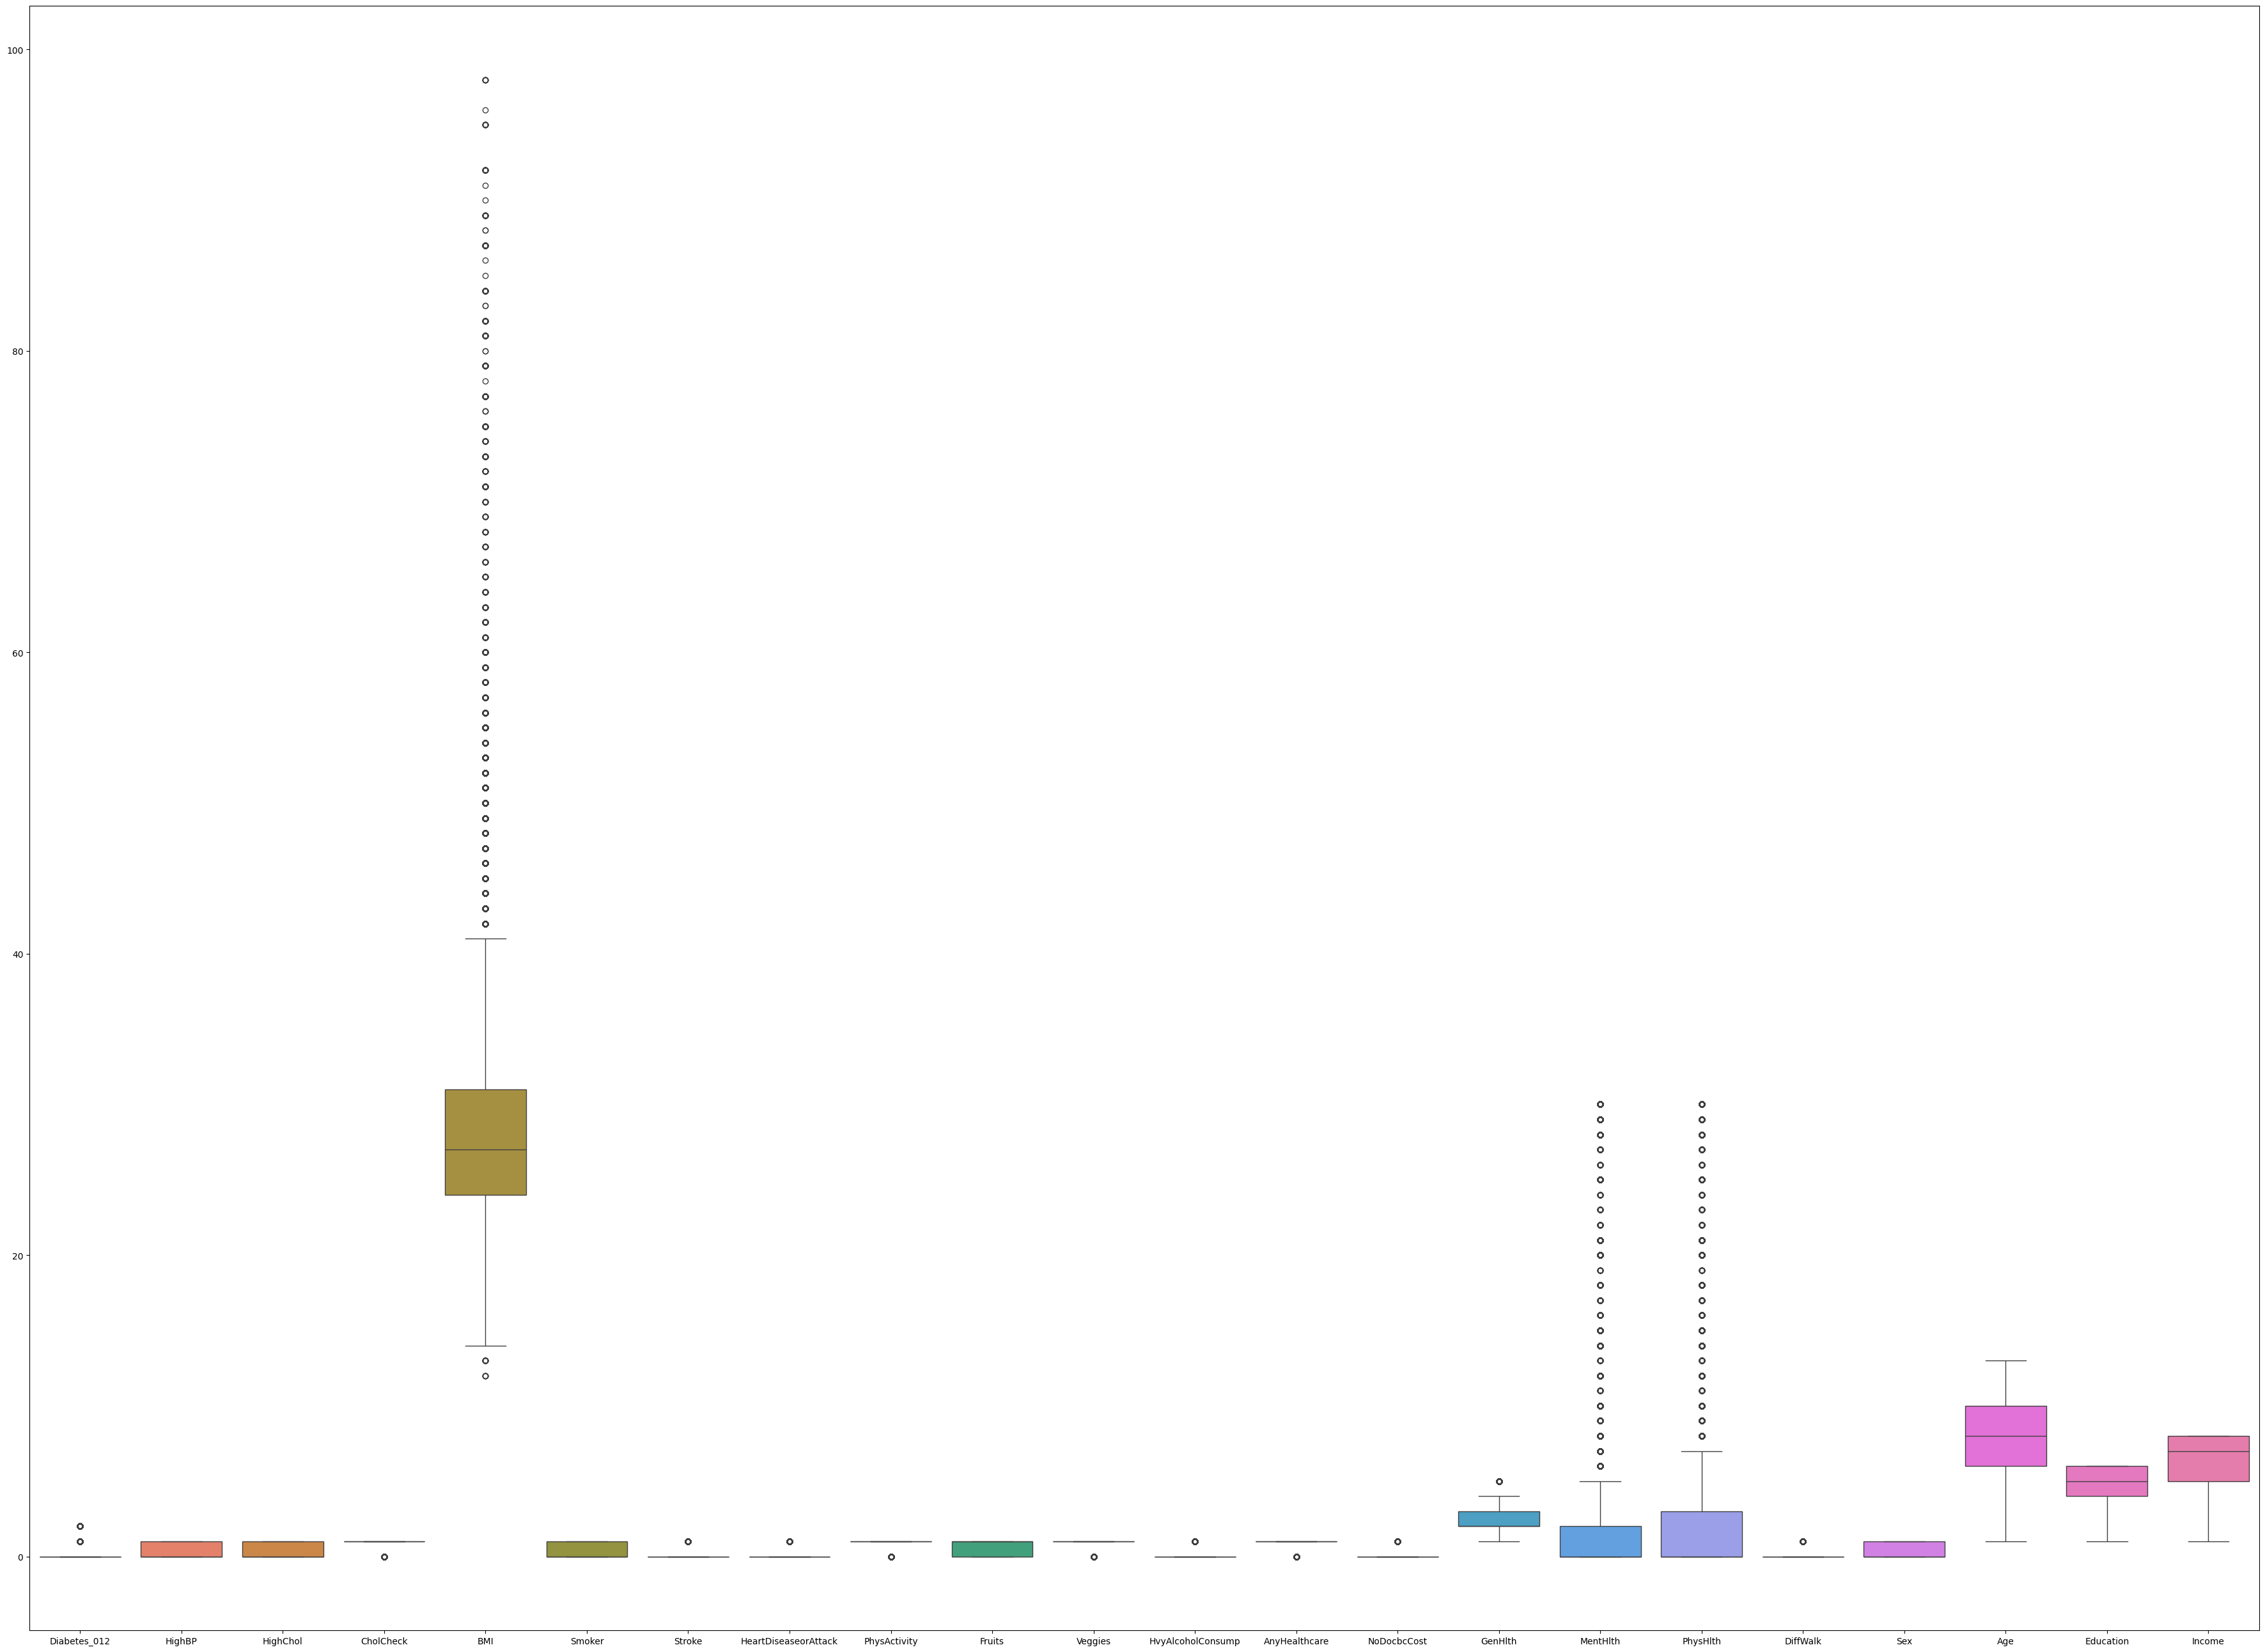

In [15]:
#Boxplot for outlier detection
plt.figure(figsize=(45,33))
sns.boxplot(data=df)
plt.show()

#Feature Selection

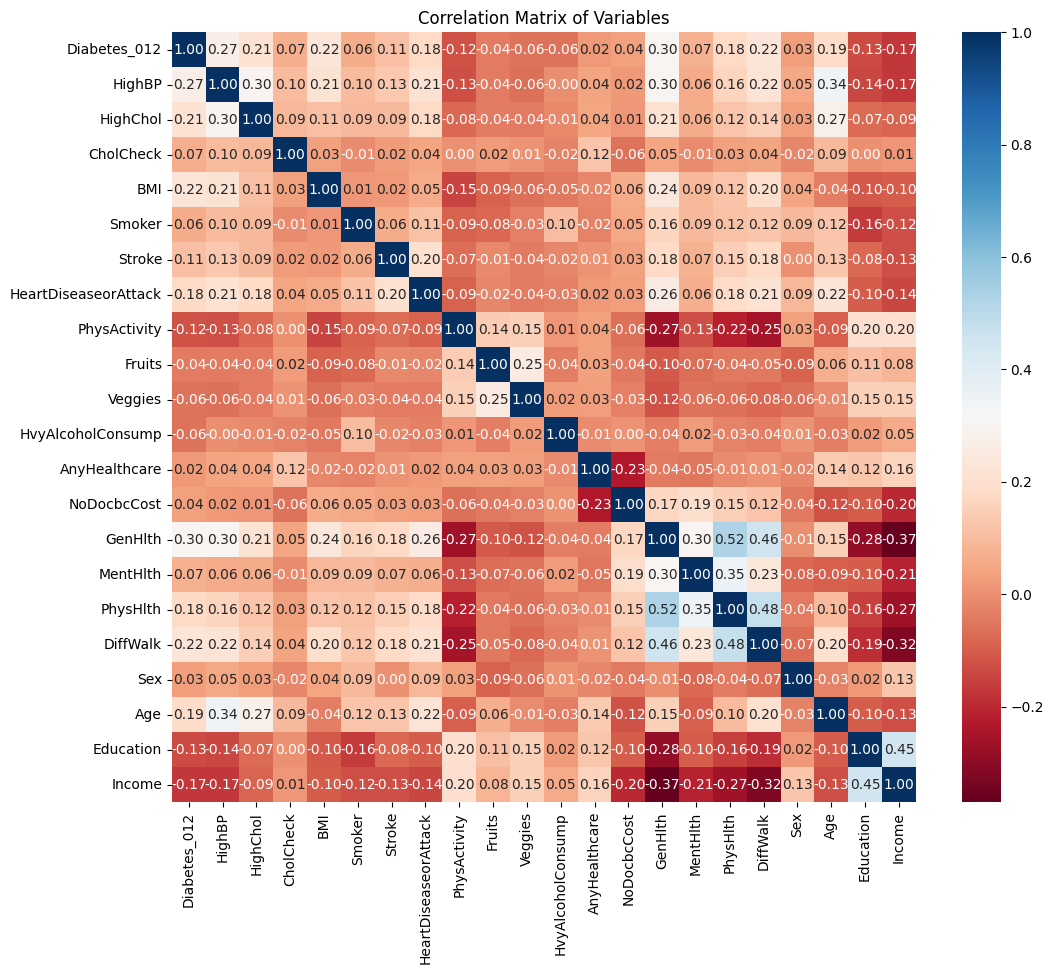

In [16]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')
plt.title('Correlation Matrix of Variables')
plt.show()


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Feature selection using SelectKBest with the chi-squared test
chi_selector = SelectKBest(chi2, k='all')  # 'k' can be set to any specific number or 'all' to rank all features
X_kbest_features = chi_selector.fit_transform(X, y)


features_scores = pd.DataFrame({'Feature': X.columns,
                                'Chi2Score': chi_selector.scores_,
                                'PValue': chi_selector.pvalues_}).sort_values(by="Chi2Score", ascending=False)

pd.set_option('display.max_rows', None)

print(features_scores)

# Get scores and p-values for each feature
chi_scores = chi_selector.scores_
p_values = chi_selector.pvalues_

                 Feature      Chi2Score         PValue
15              PhysHlth  141598.783225   0.000000e+00
14              MentHlth   24607.463010   0.000000e+00
3                    BMI   19775.252090   0.000000e+00
0                 HighBP   10731.721009   0.000000e+00
16              DiffWalk   10627.556856   0.000000e+00
13               GenHlth   10595.234173   0.000000e+00
18                   Age   10225.159975   0.000000e+00
6   HeartDiseaseorAttack    7468.339377   0.000000e+00
1               HighChol    6483.776499   0.000000e+00
20                Income    5380.434934   0.000000e+00
5                 Stroke    2798.417025   0.000000e+00
7           PhysActivity     922.529401  4.734629e-201
19             Education     849.169260  4.029379e-185
10     HvyAlcoholConsump     802.538572  5.382245e-175
4                 Smoker     562.684715  6.524792e-123
12           NoDocbcCost     362.740875   1.705374e-79
9                Veggies     168.560797   2.497400e-37
8         

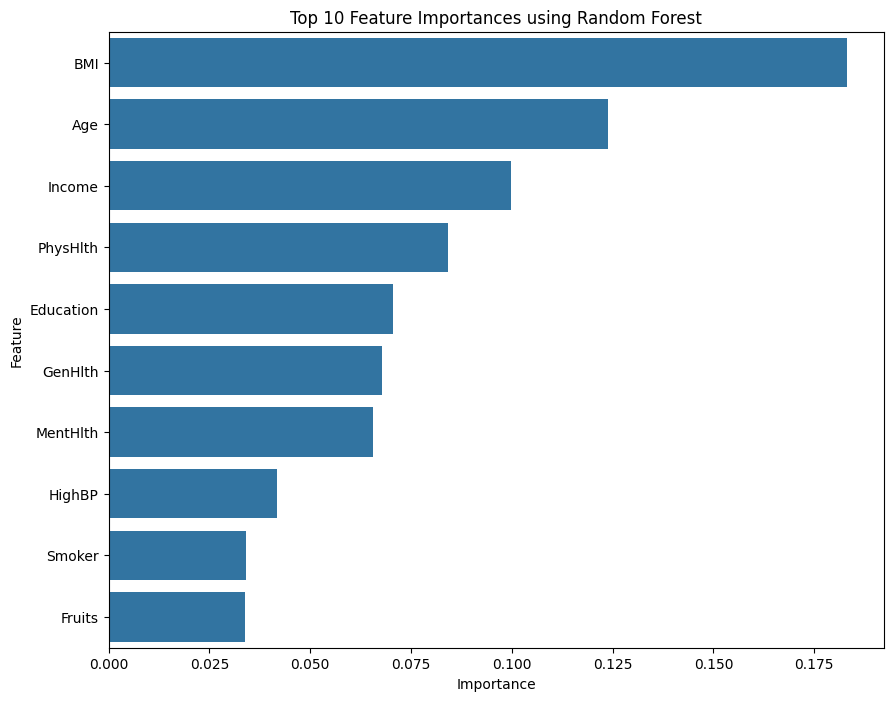

In [18]:
#Random forest feature importance

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming the target variable 'churn' is already encoded as 0s and 1s
X = df.drop(columns=['Diabetes_012'])  # Exclude 'cust_id' as it's not a feature
y = df['Diabetes_012']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Match feature names to their importance scores
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importances_sorted = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10))
plt.title('Top 10 Feature Importances using Random Forest')
plt.show()

In [19]:
desired_columns=['BMI','PhysHlth','GenHlth','MenHlth', 'Smoker','HighBP','HighChol','HyvAlcoholConsump','DiffWalk','HeartDieseaseorAttack']

#Balancing of Data

In [20]:

diabetes_index = df[df['Diabetes_012']==2].index
df.loc[diabetes_index, ['Diabetes_012']] = 1
df['Diabetes_012'].value_counts()

Diabetes_012
0    213703
1     39977
Name: count, dtype: int64

In [21]:

# Class 1 samples
class1 = len(df[df['Diabetes_012']==1])

# Sampling, balancing the dataset and creating 2 new dataframe
s0 = df[df['Diabetes_012']==0].sample(class1, random_state=73)
s1 = df[df['Diabetes_012']==1]
balanced_df = pd.concat([s0, s1], axis=0)

#checking the new balanced dataset
print(f'The shape of dataset is {balanced_df.shape}')
balanced_df['Diabetes_012'].value_counts()

The shape of dataset is (79954, 22)


Diabetes_012
0    39977
1    39977
Name: count, dtype: int64

#Visualizing Balanced Dataset

<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

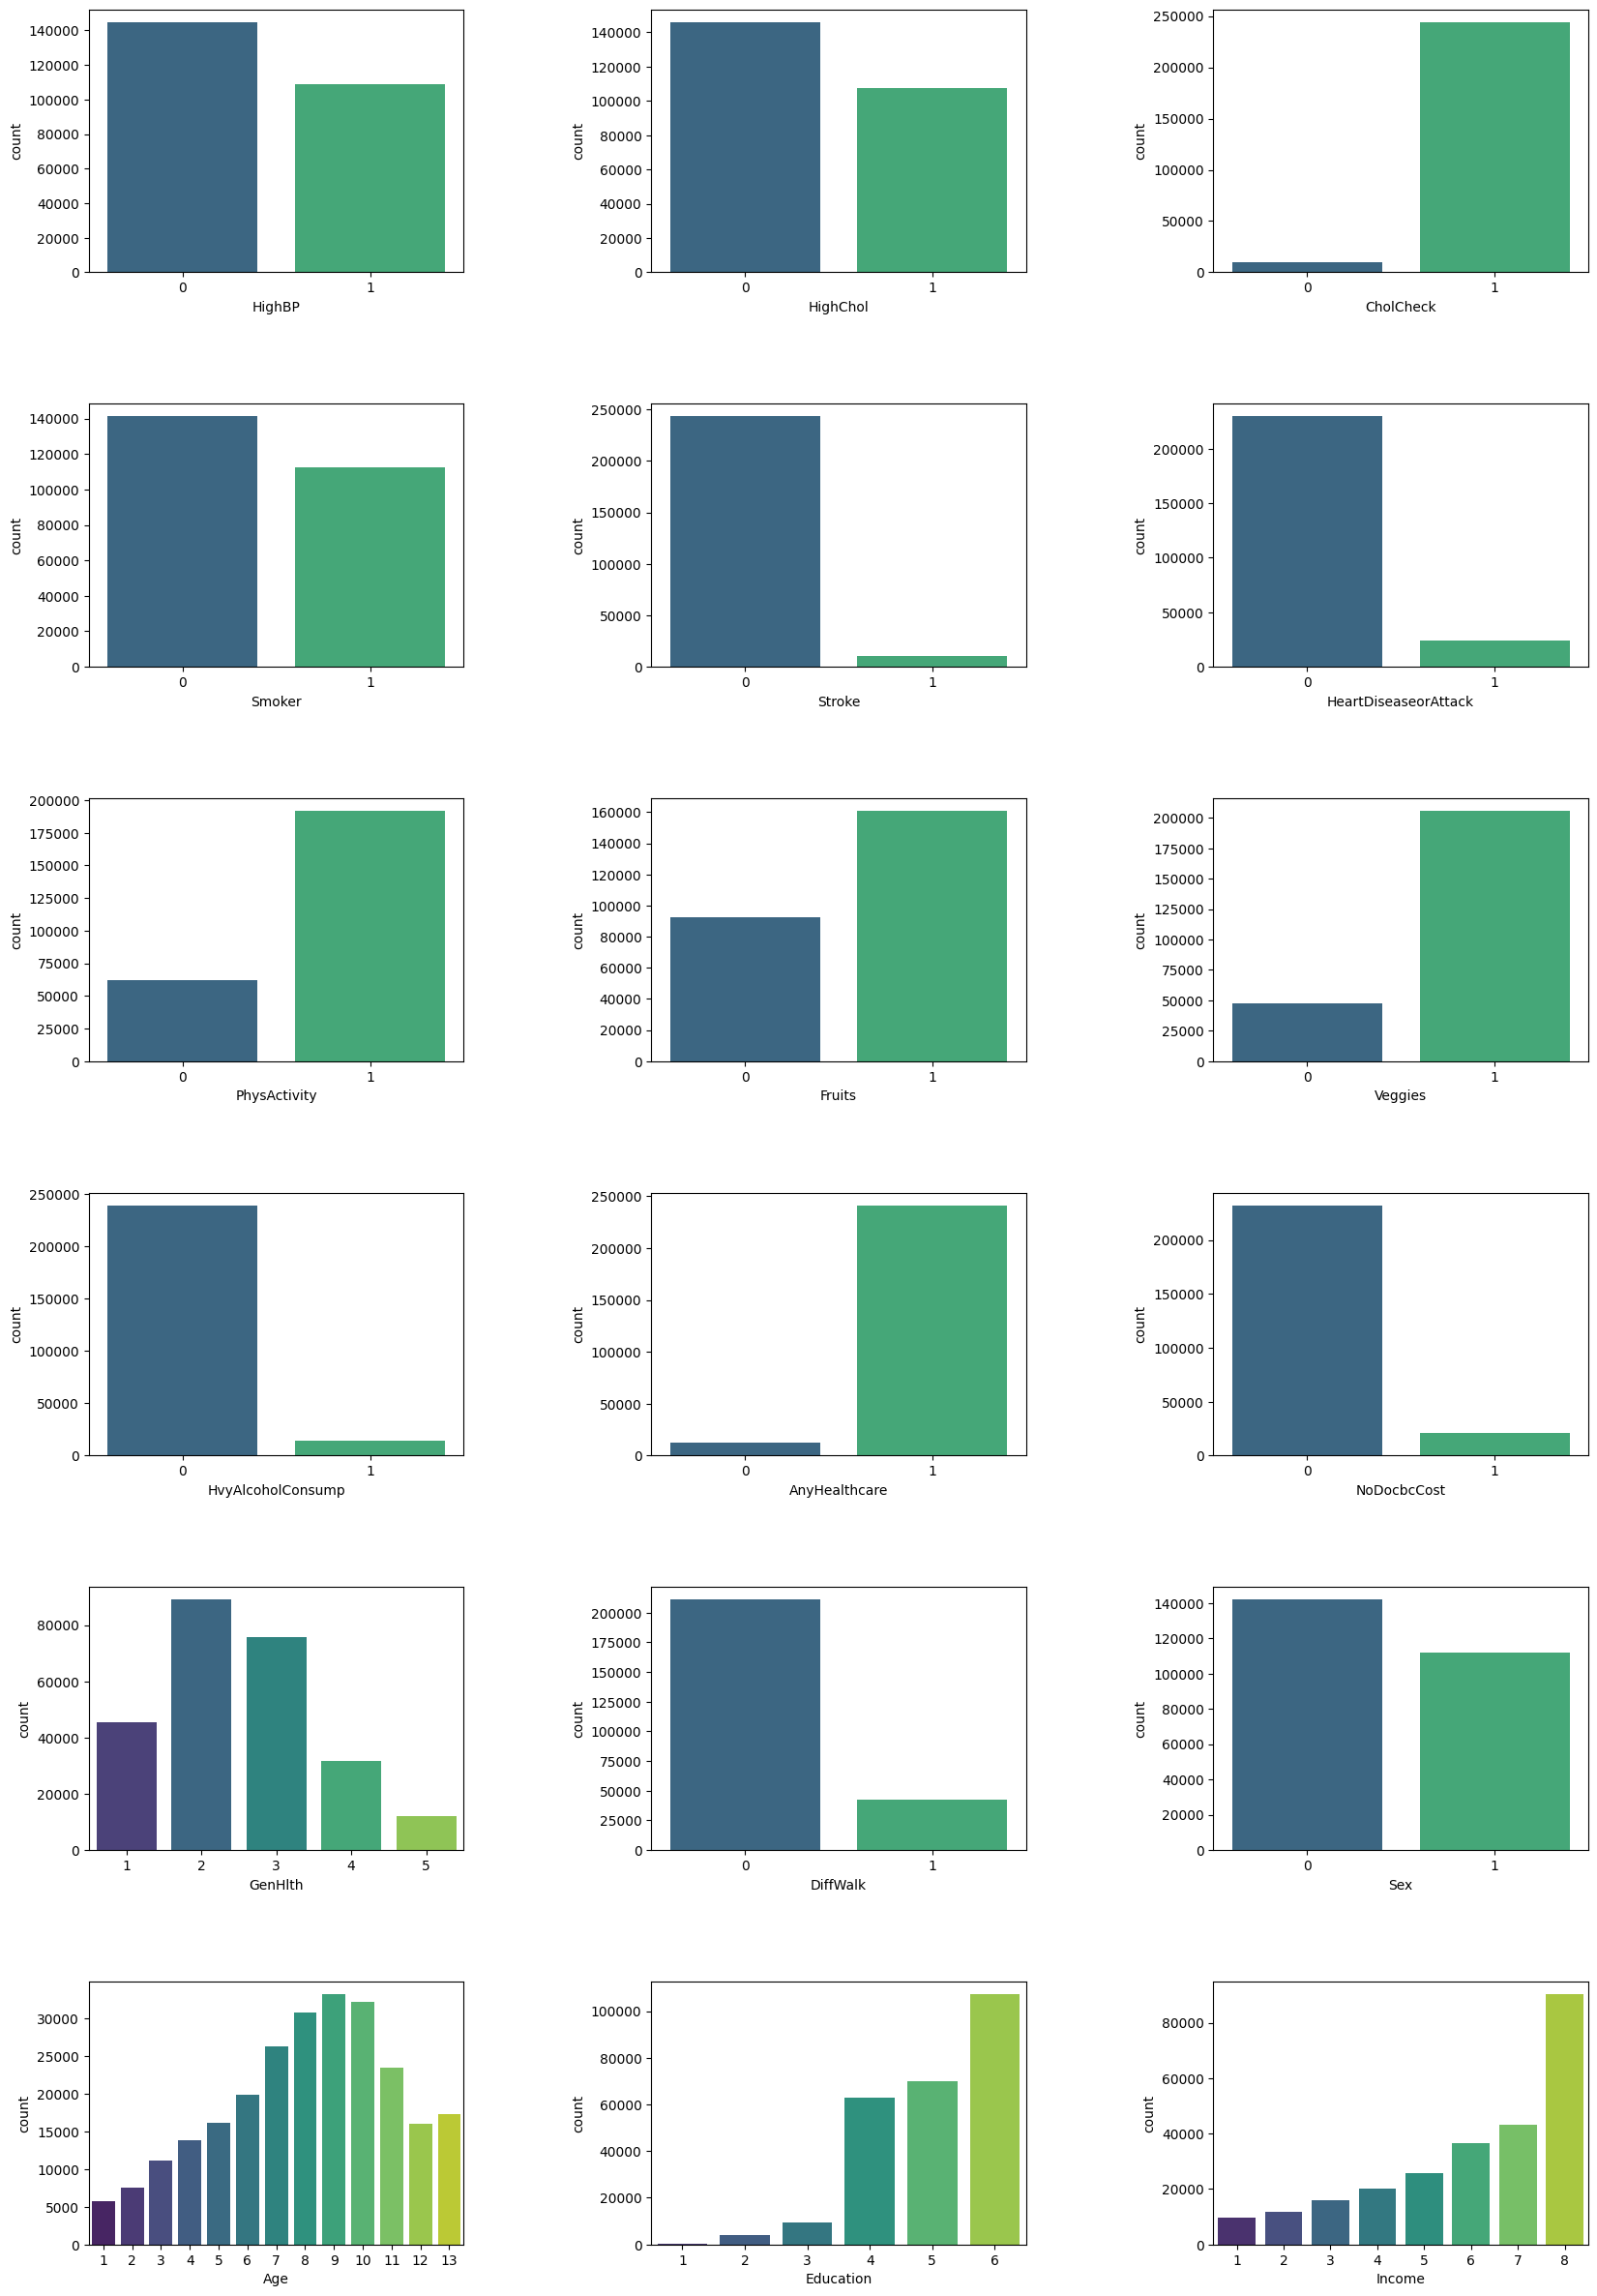

In [22]:
plot_ = [x for x in df.columns if x not in ["Diabetes_012", "BMI", "MentHlth", "PhysHlth"]]
plot(plot_, row=int(len(plot_)/3+0.5), figsize=(20, 30))

<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')
<ipython-input-8-b5e9157f1d1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col_[i]], ax=axes[i],palette='viridis')


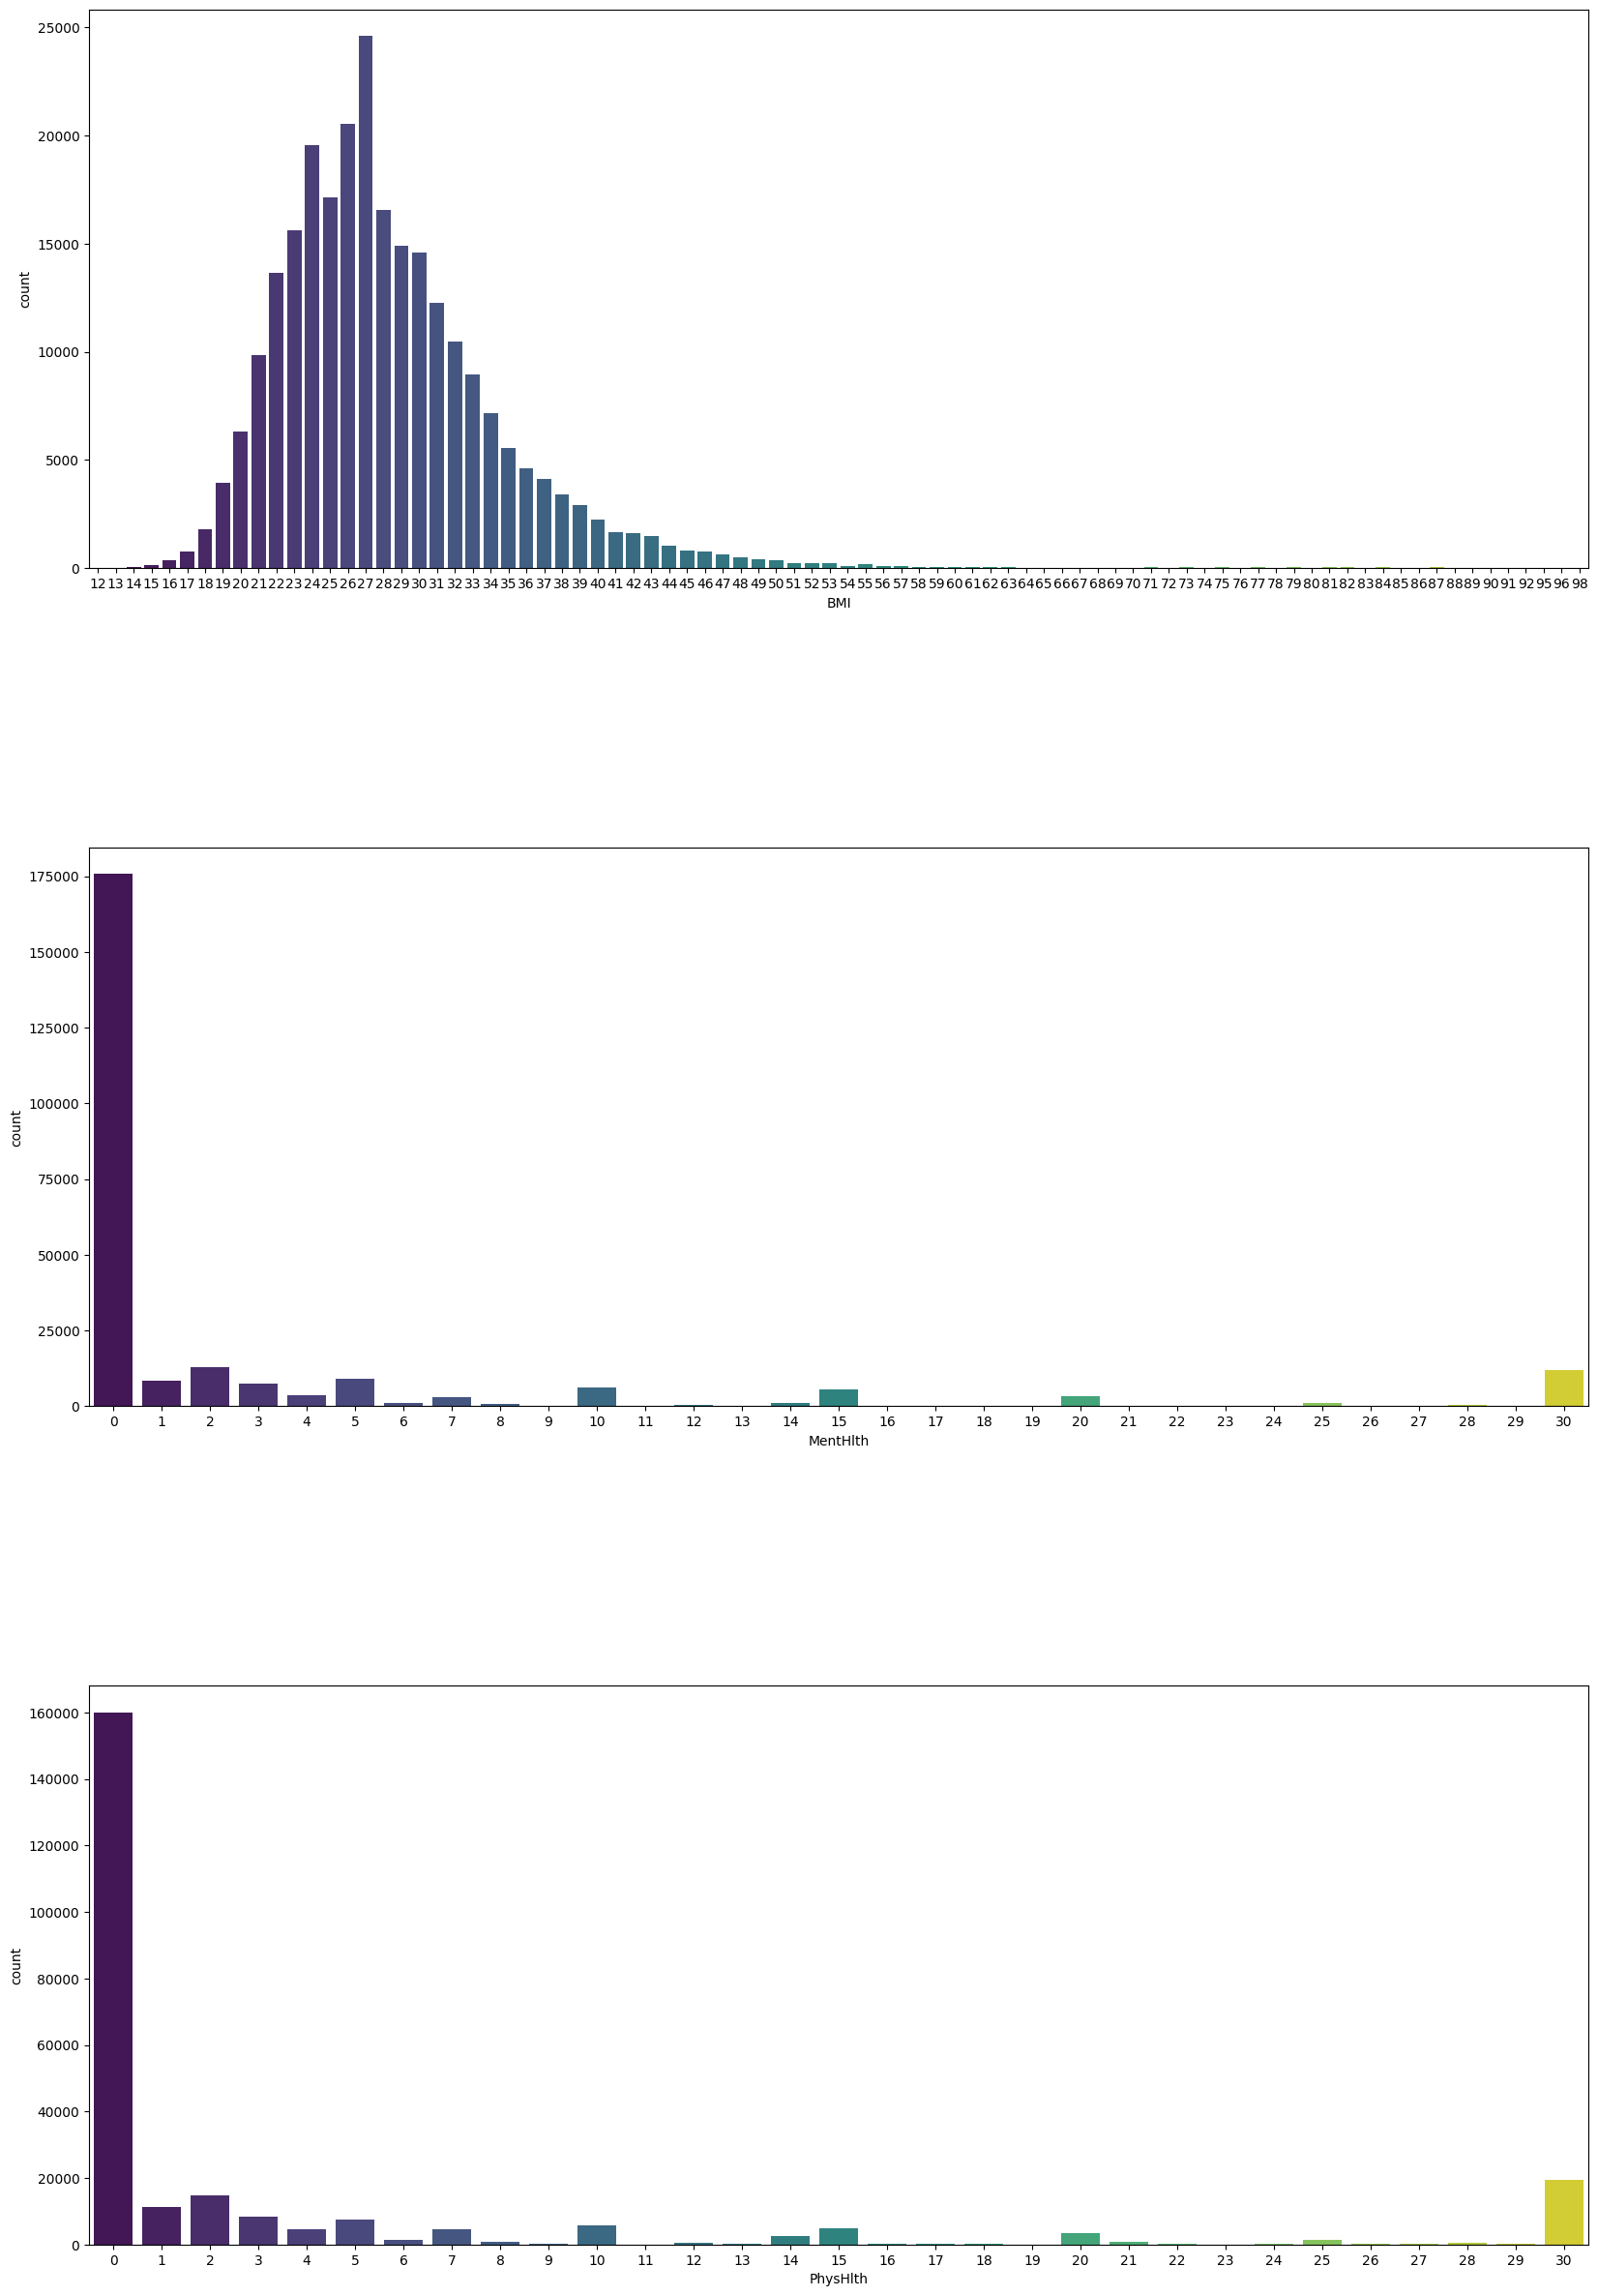

In [23]:
plot(["BMI", "MentHlth", "PhysHlth"], 3, 1, figsize=(20, 30))

#Splitting the Train and Test Daatset

In [24]:
train = balanced_df.drop(columns="Diabetes_012")
target = balanced_df["Diabetes_012"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, shuffle=True, random_state=38)


#Decision Tree Model

In [26]:
# Decision tree code
model1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model1.fit(X_train, y_train)
prediction_on_test=model1.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     11969
           1       0.70      0.76      0.73     12018

    accuracy                           0.72     23987
   macro avg       0.72      0.72      0.72     23987
weighted avg       0.72      0.72      0.72     23987



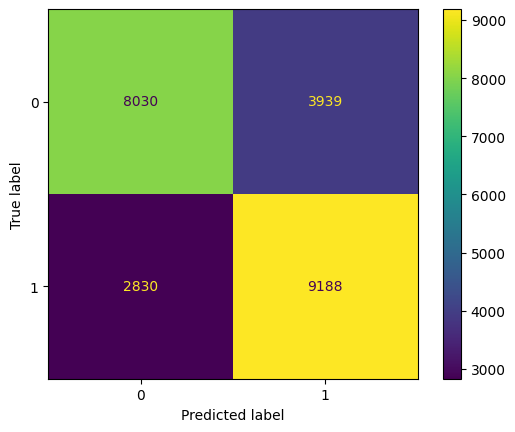

In [27]:
# Examine the evaluation results on testing data: confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model1.classes_).plot()
print(classification_report(y_test, prediction_on_test))

#Naive Bayes Model

In [28]:
# Build a Naive Bayes model on training data with default setting (1 point)
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
prediction_on_test=model_NB.predict(X_test)

              precision    recall  f1-score   support

           0       0.57      0.80      0.67     11969
           1       0.67      0.40      0.50     12018

    accuracy                           0.60     23987
   macro avg       0.62      0.60      0.59     23987
weighted avg       0.62      0.60      0.59     23987



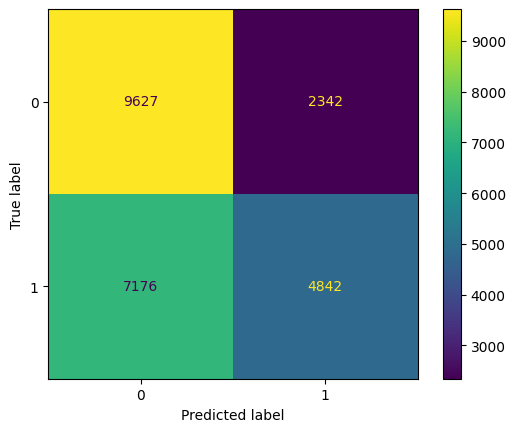

In [29]:
# Examine the evaluation results on testing data: confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_NB.classes_).plot()
print(classification_report(y_test, prediction_on_test))

#KNN Model

In [30]:
model2 = KNeighborsClassifier(n_neighbors = 5)
model2.fit(X_train, y_train)
prediction_on_test=model1.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     11969
           1       0.70      0.76      0.73     12018

    accuracy                           0.72     23987
   macro avg       0.72      0.72      0.72     23987
weighted avg       0.72      0.72      0.72     23987



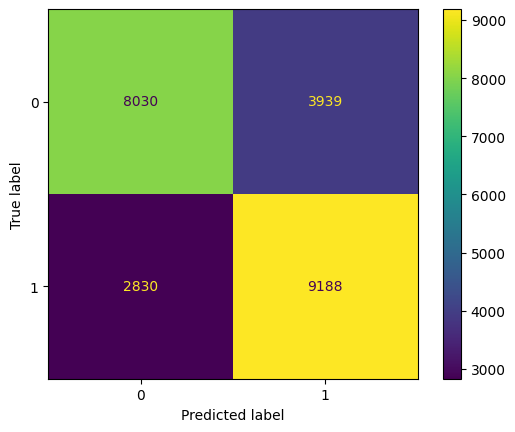

In [31]:
# Examine the evaluation results on testing data: confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model2.classes_).plot()
print(classification_report(y_test, prediction_on_test))

#SVC Model

In [32]:
model_SVM = SVC(C=10)
model_SVM.fit(X_train, y_train)
prediction_on_test=model_SVM.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     11969
           1       0.72      0.81      0.76     12018

    accuracy                           0.75     23987
   macro avg       0.75      0.75      0.74     23987
weighted avg       0.75      0.75      0.74     23987



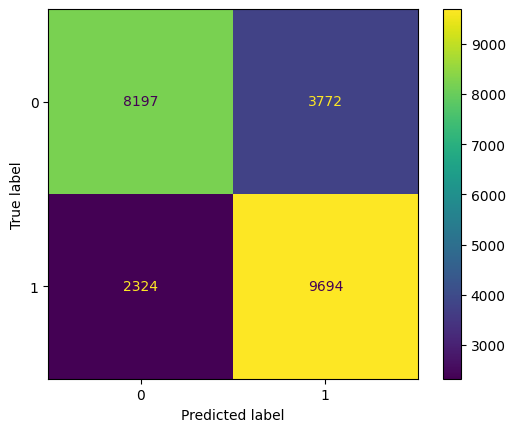

In [33]:
# Examine the evaluation results on testing data: confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_SVM.classes_).plot()
print(classification_report(y_test, prediction_on_test))

#MLP Model (Neural Network)

In [34]:
#Build MLP model contains three hidden layers: 64 hidden nodes for the first layer, 16 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1. (0.5 points)
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(hidden_layer_sizes=(64,32,8), random_state=1)
model_MLP .fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 8), random_state=1)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     11969
           1       0.73      0.78      0.75     12018

    accuracy                           0.74     23987
   macro avg       0.75      0.74      0.74     23987
weighted avg       0.75      0.74      0.74     23987



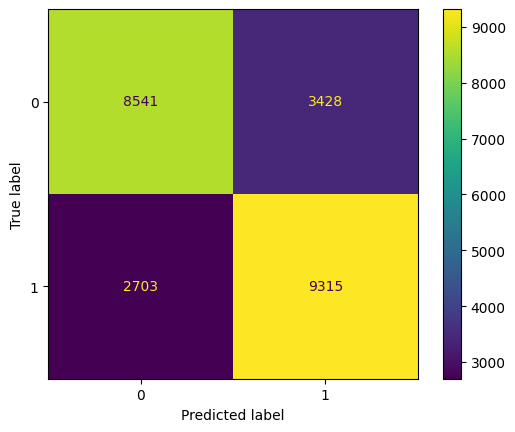

In [35]:
prediction_on_test = model_MLP.predict(X_test)
cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_MLP.classes_).plot()
print(classification_report(y_test, prediction_on_test))



#Voting Classifier

In [36]:
# Create three learners
from sklearn.linear_model import LogisticRegression
estimators = []
learner_1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
estimators.append(("Decision_Tree", learner_1))
learner_2 = SVC(C=1)
estimators.append(("SVM1", learner_2))
learner_3 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
estimators.append(("SVM2", learner_3))
learner_4 = LogisticRegression()
estimators.append(("LR", learner_4))
learner_5= model_MLP2 = MLPClassifier(hidden_layer_sizes=(16,8,8), random_state=1)
estimators.append(("MLP", learner_5))

In [37]:

from sklearn.ensemble import VotingClassifier
model_voting = VotingClassifier(estimators)
model_voting.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=1)),
                             ('SVM1', SVC(C=1)),
                             ('SVM2',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=2,
                                                     random_state=1)),
                             ('LR', LogisticRegression()),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(16, 8, 8),
                                            random_state=1))])

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     11969
           1       0.73      0.78      0.75     12018

    accuracy                           0.74     23987
   macro avg       0.75      0.74      0.74     23987
weighted avg       0.75      0.74      0.74     23987



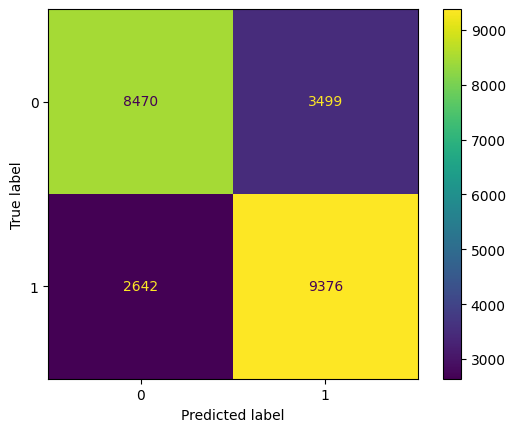

In [38]:
# Make predictions on testing data
prediction_on_test = model_voting.predict(X_test)

# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, prediction_on_test))

In [39]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Copy of ML_Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Copy of ML_Project.ipynb to html
[NbConvertApp] Writing 2058082 bytes to /content/drive/MyDrive/Colab Notebooks/Copy of ML_Project.html
